In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

from sklearn.inspection import DecisionBoundaryDisplay as dbd
from sklearn import metrics

# Data imported

In [35]:
data = pd.read_csv('wines.data', delimiter=',', header=None)
data.columns = ['class', 'alcohol', 'acid', "ash", 'alcanity', 'magnesium', 'tot_phen', 'flav', 'nonflav_phen', 'proanth', 'color', 'hue', 'OD', 'proline']
data.sample(6)
X = data.iloc[:, 1:]
y = data['class']

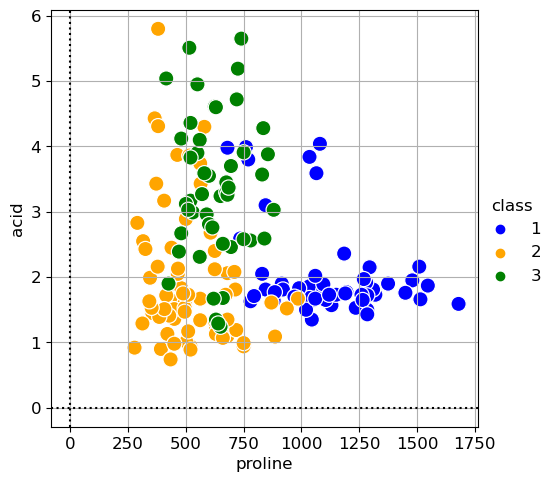

In [36]:
# we will display two random features on 2d plot
col1, col2 = np.random.choice(X.columns, size=2)
g = sns.relplot(data=data, x=col1, y=col2, hue='class', palette=['blue', 'orange', 'green'], s=120)
g.ax.spines['top'].set_visible(True)
g.ax.spines['right'].set_visible(True)
# g.ax.set_aspect('equal')

plt.axhline(0, color="black", linestyle=":")
plt.axvline(0, color="black", linestyle=":")


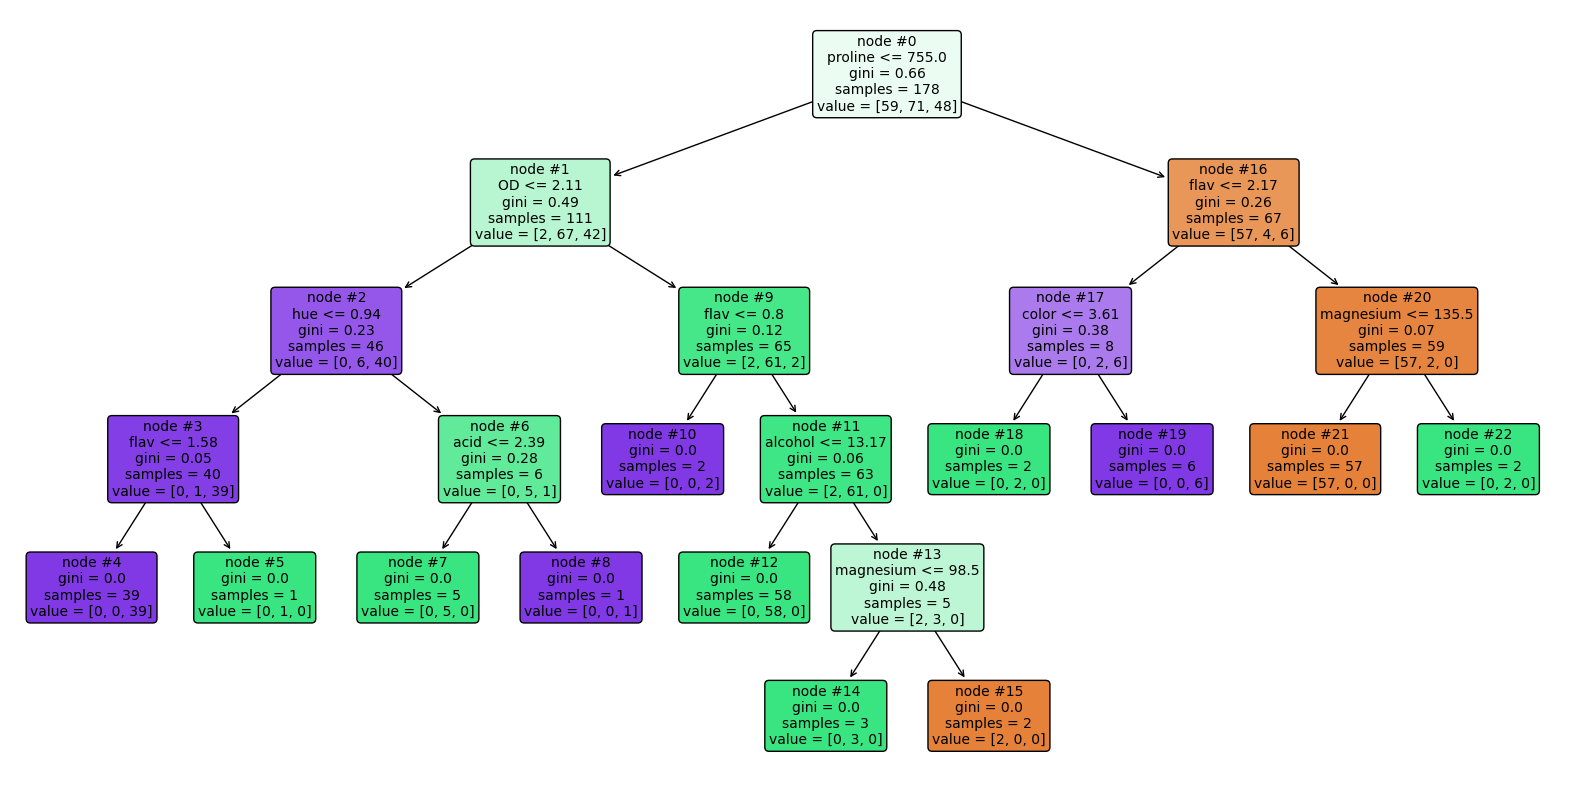

In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=data.columns[1:], fontsize=10, precision=2, node_ids=True, filled=True, rounded=True);

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Test with replacement
y_pred = clf.predict(X)
replacement_acc = metrics.accuracy_score(y, y_pred)
print(f"Test with replacement accuracy: {replacement_acc:.2f}")

# Cross-validation test
kf = RepeatedKFold(n_splits=5, n_repeats=5)
cv_acc = cross_val_score(clf, X, y, cv = kf, scoring='accuracy').mean()
print(f"Cross-val test accuracy: {cv_acc:.2f}")

Test with replacement accuracy: 1.00
Cross-val test accuracy: 0.91


Optimal trees:
| #feat.| alpha | acc. | nodes |
| 1 | 0.004 | 0.60 | 63 |
---------------------------
| 2 | 0.007 | 0.82 | 41 |
---------------------------
| 3 | 0.010 | 0.89 | 21 |
---------------------------
| 4 | 0.015 | 0.89 | 11 |
---------------------------
| 5 | 0.032 | 0.87 | 9 |
---------------------------
| 6 | 0.015 | 0.87 | 15 |
---------------------------
| 7 | 0.000 | 0.96 | 17 |
---------------------------
| 8 | 0.000 | 0.96 | 15 |
---------------------------
| 9 | 0.061 | 0.91 | 7 |
---------------------------


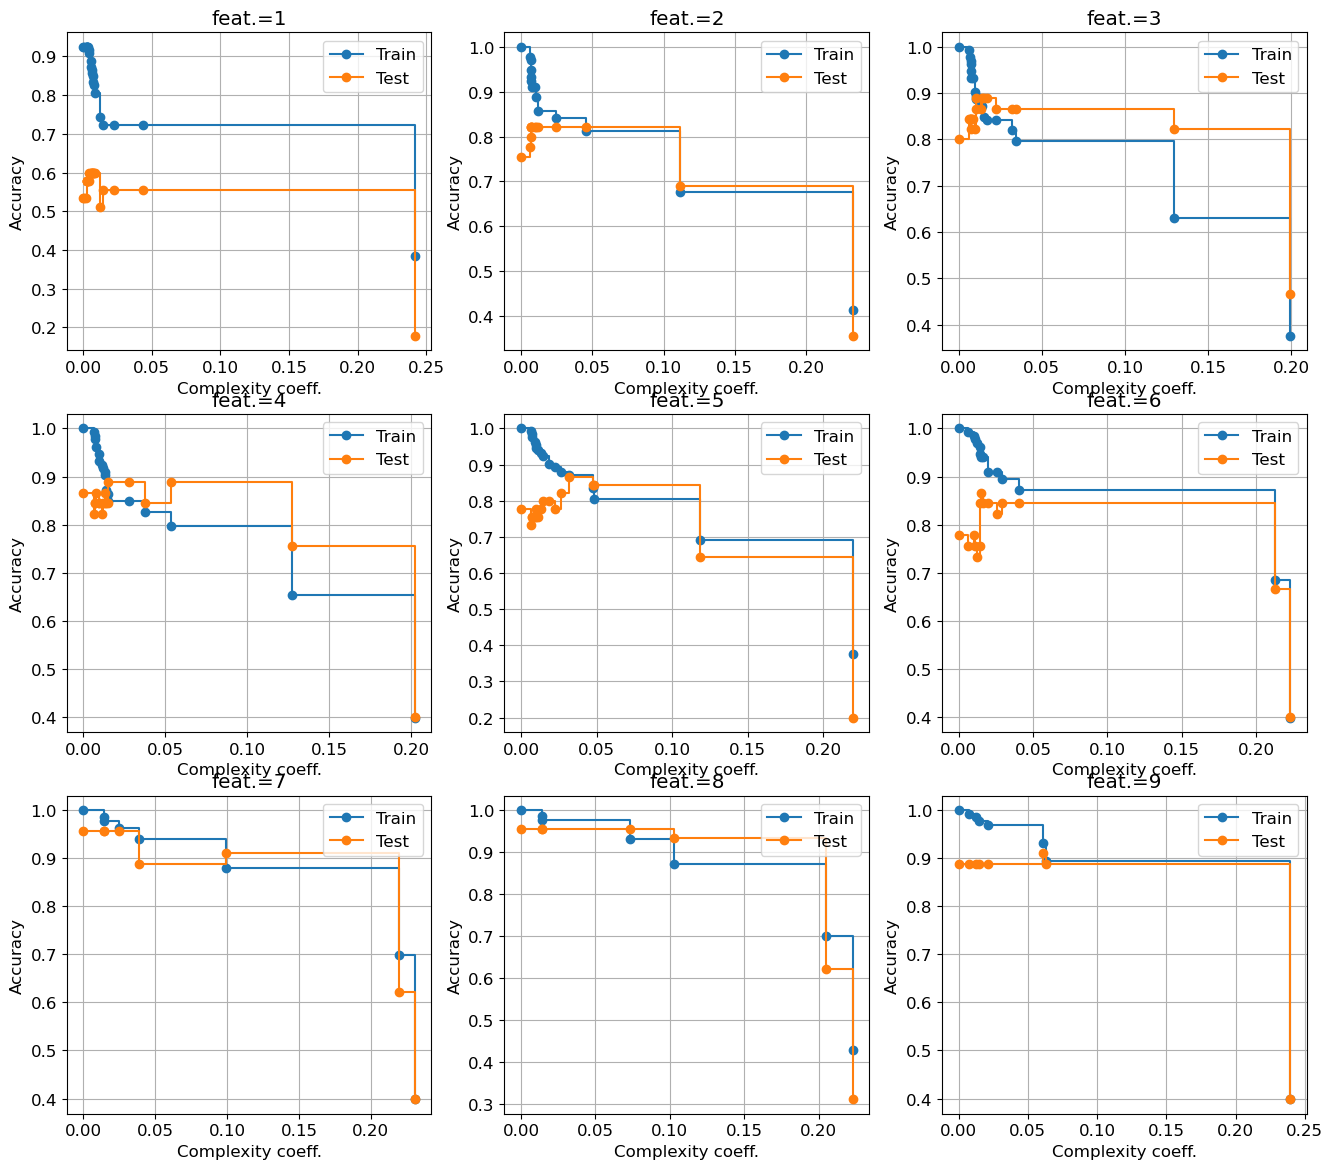

In [39]:
from sklearn.model_selection import train_test_split

plt.figure(figsize=(16,19))

num_of_features = np.arange(1, 10)
print(f"Optimal trees:")
print("| #feat.| alpha | acc. | nodes |")
for i, f in enumerate(num_of_features):
    X = data.iloc[:, 1:1+f]
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, ccp_imp = path.ccp_alphas, path.impurities

    accs_train, accs_test, node_counts = [], [], []
    for a in ccp_alphas:
        clf = tree.DecisionTreeClassifier(ccp_alpha=a)
        clf.fit(X_train, y_train)
        acc_train = clf.score(X_train, y_train)
        acc_test = clf.score(X_test, y_test)
        accs_train.append(acc_train)
        accs_test.append(acc_test)
        node_counts.append(clf.tree_.node_count)

    print(f"| {f} | {ccp_alphas[np.argmax(accs_test)]:.3f} | {np.max(accs_test):.2f} | {node_counts[np.argmax(accs_test)]} |")
    print("---------------------------")

    
    plt.subplot(len(num_of_features) // 3 + 1, 3, i+1)
    plt.plot(ccp_alphas, accs_train, 'o-', label="Train", drawstyle='steps-post')
    plt.plot(ccp_alphas, accs_test, 'o-', label="Test", drawstyle='steps-post')
    plt.ylabel('Accuracy')
    plt.xlabel("Complexity coeff.")
    plt.title(f'feat.={f}')
    plt.legend()
